In [1]:
import pandas as pd
import re
import matplotlib.pyplot as plt

pd.set_option('display.max_colwidth', None)

In [2]:
try:
    df = pd.read_csv('../data/raw.csv')
except FileNotFoundError:
    raise FileNotFoundError("Файл 'raw.csv' не знайдено.")

text_col = 'text'    
label_col = 'target' 

In [3]:
print("Перші 10 прикладів:")
display(df.head(10))

Перші 10 прикладів:


,text,target
0,"В кінцевому результаті роботою данного інтернет-магазину залишився задоволеним, завдяки вдалій роботі одного із трьох менеджерів, з якими спілкувався по замовленню (Ігор вміє почути клієнта, зрозуміти суть проблеми та неймовірно швидко її вирішити).\nВедуть трішки нечесну (на мій погляд) роботу по формуванню ціни - на сайті вказують мінімальну ціну, а потім при виставленні реквізитів на оплату, в смс, та й по телефону надбавляють ще ""незрозумілу комісію банку"", - вкажіть це в умовах оплати на сайті, ну і назвіть це якось правильно)\nДякую Вам, успіхів і процвітання!\n розгорнути\n згорнути",positive
1,"12.04.16 замовив MD818 (доставили швидко, тут питань немає), звичайно ж я уточнив пару раз оригінальний чи кабель, на що отримав позитивну відповідь. Розпакував отриманий кабель я не виявив написів на кабелі, заходимо на сайт Apple і читаємо що повинна бути напис An Apple Lightning to USB cable has &quot;Designed by Apple in California&quot; and either &quot;Assembled in China,&quot; &quot;Assembed in Vietnam,&quot; or &quot; Indústria Brasileira &quot;on the cable about seven inches from the USB connector. Дзвоню в Стилус, пояснюю що немає напису. Відповідають, що кабель оригінал і все. Я прошу якісь документи що підтверджують де був куплений цей кабель, відповідь негативна. Потім мені просто говорять &quot;привозите здавайте&quot;. Втрачати 499 грн на китайському кабелі мені не хотілося (нехай він навіть MFi сертифікований). Привіз кабель в магазин. &quot;Яка причина повернення?&quot; запитують у мене, я відповідаю &quot;ні лого Apple як на оригіналі&quot;, у відповідь &quot;а, зрозуміло&quot;. Через три хвилини мені дають папірець і кажуть пройти в касу, отримую 499 грн і йду. НІ ПАСПОРТИ ні інших документів не попросили. Мда, більше в ваш магазин немає бажання звертатися. Розгорнутим згорнути",negative
2,"Зірвали передноворічний замовлення, зіпсували празднік.Прічем менеджер весь час (починаючи з 26 грудня) обманював-повідомляв що товар на складі, тільки служба дрставкі перевантажена, три дня сидів удома, чекав доставку, 30 з&#39;ясувалося, що товару немає і коли буде неізвестно.Связался з начальником служби якості, катерина обіцяла розібратися і передзвонити після 7 січня. 25 січня сам подзвонив в магазин-виявляється начальник служби якості і менеджер оформляв замовлення звільнилися і вообщем то нікому пред&#39;являти претензії. наскільки можна всього цього Верма-судити вам я і мої друзі від послуг вишеупомянотго магазину відмовляються і організовуємо антирекламну компанію даного магазину Розгорнутим згорнути",negative
3,"Замовив корпус і блок живлення (комплект) - зі сторінки http://hard.rozetka.com.ua/zalman_zm_m1_plus_aerocool_vx600/p10615903/ перейшов по посиланню на ""є товар з уцінкою"". В описі причину зниження ціни ""порушена цілісність упаковки"". Загалом як би не критично і знижка була приємна. Замовив 17.03. Доставили в термін 21.03. І все б нічого ...\nПри огляді виявив, що в посилці відсутня блок живлення. Набрав оператору - ""Альоша"" порадив оплатити і забрати посилку, а з приводу недопоставки звернутися в сервіс по пошті service@rozetka.com.ua. Що я і зробив в той же день, прикріпивши все доки (фото, накладні, чеки, акт прийому передачі від НП, що підтверджує відсутність БП). Додатково звернувся через форму на сайті описавши ситуацію в двох словах.\nРезультат: через пару днів відгукнувся відділ підтримки (звернення через форму на сайті) - відповідь прозаїчний - смітячи типу, але це була помилка на сайті і ніякого блоку живлення бути не повинно, можете повернути або обміняти товар, на сайті блок є, в накладній є , є навіть папірець супровідна для блоку живлення, і він також вписаний в гарантійному талоні ""розетки"". АЛЕ - сорри його типу немає і не повинно бути))) а юрист мій каже - всі документи є, боки не твої ...\nСам корпус без захисних плівок, упаковка дійсно пошкоджена, присутні сліди використання ... але коли в ціні є блок живлення, це не критично і типу як знаєш, на що йдеш ...\nСлу

In [4]:
total_texts = len(df)
print(f"Кількість текстів: {total_texts}")

Кількість текстів: 3034


In [5]:
df['char_len'] = df[text_col].astype(str).apply(len)
df['word_len'] = df[text_col].astype(str).apply(lambda x: len(x.split()))

print(f"Середня довжина (символи): {df['char_len'].mean():.2f}")
print(f"Медіанна довжина (символи): {df['char_len'].median():.2f}")
print(f"Середня довжина (слова): {df['word_len'].mean():.2f}")
print(f"Медіанна довжина (слова): {df['word_len'].median():.2f}")

Середня довжина (символи): 1096.68
Медіанна довжина (символи): 897.00
Середня довжина (слова): 164.03
Медіанна довжина (слова): 132.00


Розподіл класів:
target
negative    1922
positive    1112
Name: count, dtype: int64


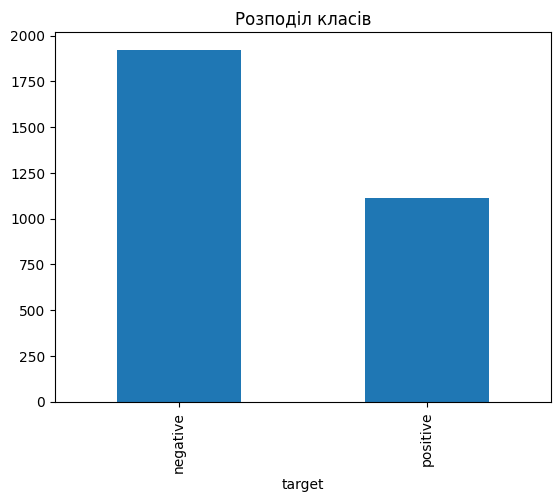

In [6]:
print(f"Розподіл класів:")
class_counts = df[label_col].value_counts()
print(class_counts)

class_counts.plot(kind='bar', title='Розподіл класів')
plt.show()

In [7]:
def basic_cleaning(text):
    text = str(text)
    text = re.sub(r'\s+', ' ', text).strip()
    text = re.sub(r"[’‘`´“”]", "'", text)
    text = re.sub(r'http\S+|www\.\S+', '<URL>', text)
    text = re.sub(r'\S+@\S+', '<EMAIL>', text)
    text = re.sub(r'\+?\d{10,12}', '<PHONE>', text)
    return text

In [8]:
df['cleaned_text'] = df[text_col].apply(basic_cleaning)

print("Приклад нормалізації:")
display(df[[text_col, 'cleaned_text']].sample(5))

Приклад нормалізації:


,text,cleaned_text
350,"Зробив замовлення 23го числа о 1:20 ночі, вранці прийшла смс що товар можна забирати з 23го грудня з 12:00 за 26 грудня. Прийшовши в магазин 25го грудня, і не виявивши його на пункті видачі я звернувся до консультантів, мені сказали що з моїм замовленням сталася помилка і мій товар просто поїхав на пересортовування. На відповідь чому мене не попередили дзвінком або смской мені нічого толком не відповіли, запропонували доставку товару на 29 число, пояснивши ситуацію що в цей період мене вже не буде в Києві. Інших альтернатив не запропонували зовсім аргументуючи тим що знижка на товар у мене вже є. У підсумку даремно витрачав час на порожню поїздку в цей магазин. Так само був другий замовлення (202902609) та в ньому упаковка від товару була просто відкрита фото є у відповідях адміністрації можу надати.\n Розгорнутим\n згорнути","Зробив замовлення 23го числа о 1:20 ночі, вранці прийшла смс що товар можна забирати з 23го грудня з 12:00 за 26 грудня. Прийшовши в магазин 25го грудня, і не виявивши його на пункті видачі я звернувся до консультантів, мені сказали що з моїм замовленням сталася помилка і мій товар просто поїхав на пересортовування. На відповідь чому мене не попередили дзвінком або смской мені нічого толком не відповіли, запропонували доставку товару на 29 число, пояснивши ситуацію що в цей період мене вже не буде в Києві. Інших альтернатив не запропонували зовсім аргументуючи тим що знижка на товар у мене вже є. У підсумку даремно витрачав час на порожню поїздку в цей магазин. Так само був другий замовлення (202902609) та в ньому упаковка від товару була просто відкрита фото є у відповідях адміністрації можу надати. Розгорнутим згорнути"
2904,"Замовив 4 числа вранці, оплатив всю суму, в особистому кабінеті написано буде відправлено 5-у числа! Сьогодні вже сьома товар мені ніхто не відправив! Додзвонитися не реально, на скарги не відповідають!\nЗамовив би краще в іншому місці, я взяв би термопасту ще 5-ть числа!\nЦей магазин не рекомендую !!!\nШкода що оплатив відразу з карти, якщо накладеним я б не забрав з такими поставками!\nЯк вони не розуміють що я якщо роблю замовлення то я дивлюся на число відправки, від цього розумію коли приїде, розраховую на що то.\n Розгорнутим\n згорнути","Замовив 4 числа вранці, оплатив всю суму, в особистому кабінеті написано буде відправлено 5-у числа! Сьогодні вже сьома товар мені ніхто не відправив! Додзвонитися не реально, на скарги не відповідають! Замовив би краще в іншому місці, я взяв би термопасту ще 5-ть числа! Цей магазин не рекомендую !!! Шкода що оплатив відразу з карти, якщо накладеним я б не забрав з такими поставками! Як вони не розуміють що я якщо роблю замовлення то я дивлюся на число відправки, від цього розумію коли приїде, розраховую на що то. Розгорнутим згорнути"
2932,"Купив товар, через корзіну.https: //clip2net.com/s/41THiNu\nВідразу ж оплатив і став ждать.Как бачите сьогодні 03.06.2019.\nТовар комплектується перевізником, але проблема в тому, що перевізник не отримав товар.ТТН просто не бьyoтся.Позвоніл в нову пошту, мені розповіли всю процедуру надходження та відправлення покупок.\n1.Розетка в своєму особистому кабінеті (нової пошти) в праві створювати експрес накладні.\n2. Після створення експрес накладної, передають як правило товар в нову пошту і його пропіківают сканером і тоді можна відстежувати шлях.\nАле не можна пропікать то, чого їм не передали, тобто розетка може передавати товар тижнями .... Виходить так .... Ще й оператори говорять неправду, що товар передали .... Мовляв це у пошти щось.\nЗа пів року, я в розетці купив 4 покупки, 2 цієї статті не проблемні, а 2 проблемні.\nМинула проблемна покупка була з монітором, коли монітор поїхав в інший край країни, а мені привезли цукерки .... І все через оплаченого товару, який раз переконуюся, що не потрібно оплачувати товар завчасно, ви тоді магазину стаєте не цікаві .. .\nНе рекомендую оплачувати пакупку через карту онлайн.\n Розгорнутим\n згорнути","Купив товар, через корзіну.<URL> /

In [9]:
duplicates_count = df.duplicated(subset=['cleaned_text']).sum()
duplicates_pct = (duplicates_count / total_texts) * 100
print(f"Точні дублі: {duplicates_count} ({duplicates_pct:.2f}%)")

Точні дублі: 9 (0.30%)


In [10]:
short_texts = df[df['cleaned_text'].apply(lambda x: len(x.split()) < 5)]
print(f"Короткі тексти (< 5 слів): {len(short_texts)}")

Короткі тексти (< 5 слів): 0


In [11]:
garbage_rows = df[df['cleaned_text'].str.match(r'^[\d\W_]+$')]
print(f"Сміттєві рядки (лише цифри/символи): {len(garbage_rows)}")

Сміттєві рядки (лише цифри/символи): 0


In [13]:
df['id'] = range(1, len(df) + 1)
labels_df = df[['id', label_col]].copy()
labels_df.columns = ['id', 'label']

labels_df.to_csv('../data/labels.csv', index=False)

In [14]:
df[['id', 'cleaned_text']].to_csv('../data/processed.csv', index=False)

In [ ]:
"""
ВИСНОВОК:

Зібрано та проаналізовано датасет із 3034 українських відгуків на товари. Тексти довгі (медіана 132 слова),
що є плюсом для навчання моделі. Якість даних висока: повністю відсутні "сміттєві" рядки та короткі тексти і 
кількість дублікатів мала (0.3%).

Ризики:
1. Дисбаланс класів: негативних відгуків (1922) майже вдвічі більше, ніж позитивних (1112). Модель може
краще розпізнавати негативні відгуки, ігноруючи позитивні.
2. Шум: у прикладах після нормалізації залишились фрази із сайту (наприклад, "розгорнути", "згорнути") та 
HTML-сутності (наприклад, &#39;), які треба чистити окремо.

Треба доробити:
- збалансувати класи
- видалити технічні фрази ("розгорнути", "згорнути")
"""